In [12]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150
from matplotlib.lines import Line2D
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
%matplotlib notebook

# OFAT analysis
The csv file to be analyized is specified in the first parameter.

In [2]:
csv_file = 'batch_lanes_2.csv'
rl2 = pd.read_csv('batch_lanes_2.csv')
rl2.drop(rl2.columns[0], axis=1, inplace=True)
rl2g = rl2.groupby('Run')
rl2gm = rl2g.agg(np.mean)

In [23]:
print("Available parameters:\n")
for x in rl2gm.columns:
  print("   - "+x)

Available parameters:

   - Avg_speed
   - Cars_in_lane
   - Avg_slowdown
   - spawn_chance
   - agression
   - lanes


# 3D plot
An example 3D plot, the parameter of the 3 axis can be specified in the respective variable.
Although not a true OFAT analysis, a 3D plot can be valuable in finding interaction without resorting to the
expensive Sobol analysis

<IPython.core.display.Javascript object>


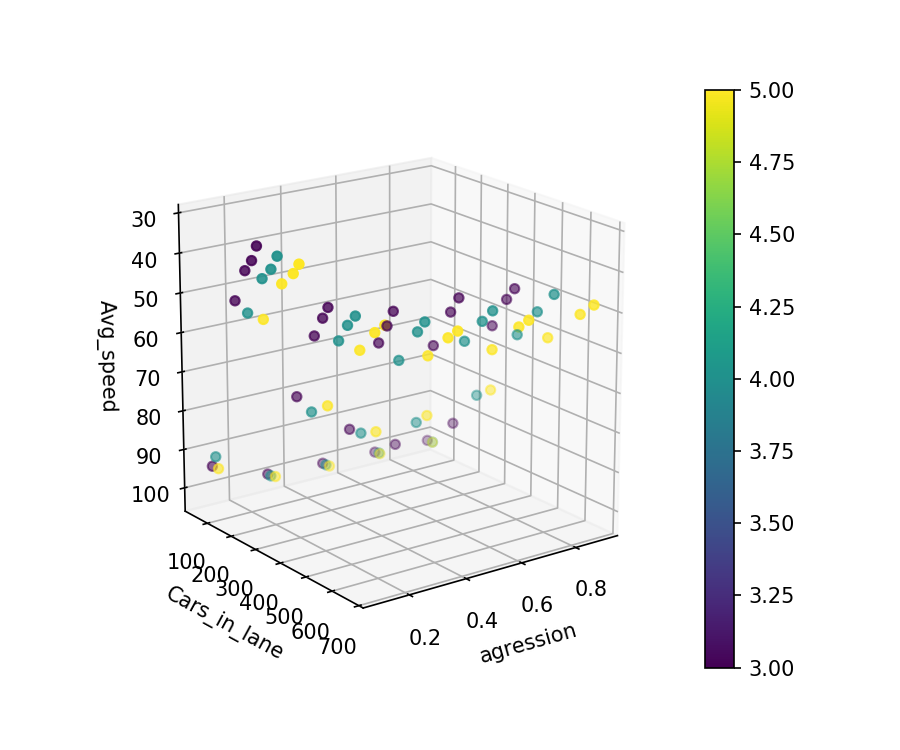

In [13]:
driedee = plt.figure(figsize=(6,5)).gca(projection='3d')
x_as = 'agression'
y_as = 'Cars_in_lane'
z_as = 'Avg_speed'
kleur = 'lanes'
p = driedee.scatter(rl2gm[x_as], rl2gm[y_as], rl2gm[z_as], c=rl2gm[kleur])
driedee.set_xlabel(x_as)
driedee.set_ylabel(y_as)
driedee.set_zlabel(z_as)
plt.colorbar(p)
plt.show()

# Scatter plot
An example 2D scatter plot, this can be used to perform a pure OFAT analysis or analyze the effect of an additional
discrete parameter through color.

<IPython.core.display.Javascript object>


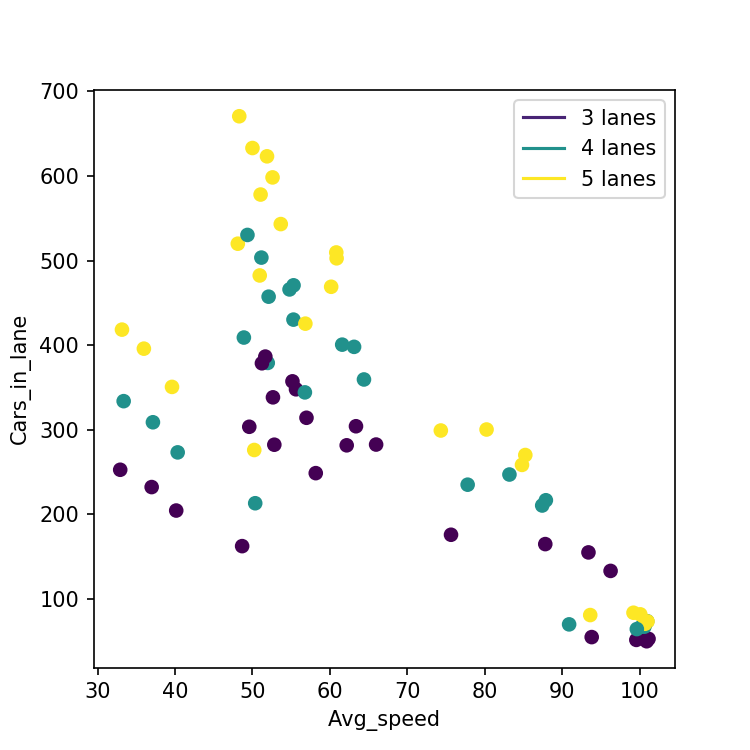

In [15]:
x_as = 'Avg_speed'
z_as = 'spawn_chance'
y_as = 'Cars_in_lane'
kleur = 'lanes'
plt.figure(figsize=(5,5))
cmap = plt.cm.viridis
plt.scatter(rl2gm[x_as], rl2gm[y_as], c=rl2gm[kleur])
plt.xlabel(x_as)
plt.ylabel(y_as)
legend_elements = [
  Line2D([0], [0], color=cmap(0.1), label='3 lanes'),
  Line2D([0], [0], color=cmap(0.5), label='4 lanes'),
  Line2D([0], [0], color=cmap(1.0), label='5 lanes')
]
plt.legend(handles=legend_elements)

plt.show()